In [48]:
import pickle
import os
from collections import Iterable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import copy

sns.set()
plt.rcParams.update({'font.size': 22})

In [2]:
def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
            yield item
            
def find(lst, s):
    return [i for i, x in enumerate(lst) if x==s]

def keys_exists(element, *keys):
    '''
    Check if *keys (nested) exists in `element` (dict).
    '''
    if not isinstance(element, dict):
        raise AttributeError('keys_exists() expects dict as first argument.')
    if len(keys) == 0:
        raise AttributeError('keys_exists() expects at least two arguments, one given.')

    _element = element
    for key in keys:
        try:
            _element = _element[key]
        except KeyError:
            return False
    return True

In [84]:
def compute_aggreated_results_dict(algorithm, dataset, path='../results', err_metric='mase'):
    results_dict={}
    for file in [path for path in os.listdir(path) if algorithm in path and dataset in path and 'orig' in path]:
        with open(f'{path}/{file}', 'rb') as handle:
            results_dict = pickle.load(handle)
        handle.close()
    return results_dict['wall_time']

In [85]:
datasets = ['prison']
for d in datasets:
    #dict_gpf = compute_aggreated_results_dict(algorithm='gpf', dataset=d)
    dict_mint = compute_aggreated_results_dict(algorithm='mint', dataset=d)
    dict_deepar = compute_aggreated_results_dict(algorithm='deepar', dataset=d)

In [86]:
df_mint = pd.DataFrame(dict_mint, index=['mint'])
df_deepar = pd.DataFrame(dict_deepar, index=['deepar'])
df = pd.concat([df_mint, df_deepar])

In [87]:
df = df.drop(['wall_time_preprocess', 'wall_time_build_model', 'wall_time_predict'], axis=1)

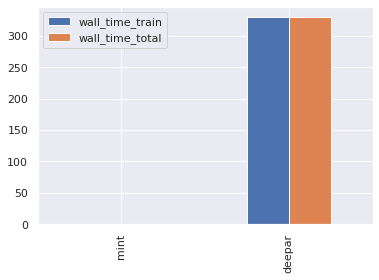

In [89]:
df.plot(kind='bar');